In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv('osi.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
data.shape

(12330, 18)

In [5]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [11]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [8]:
data['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


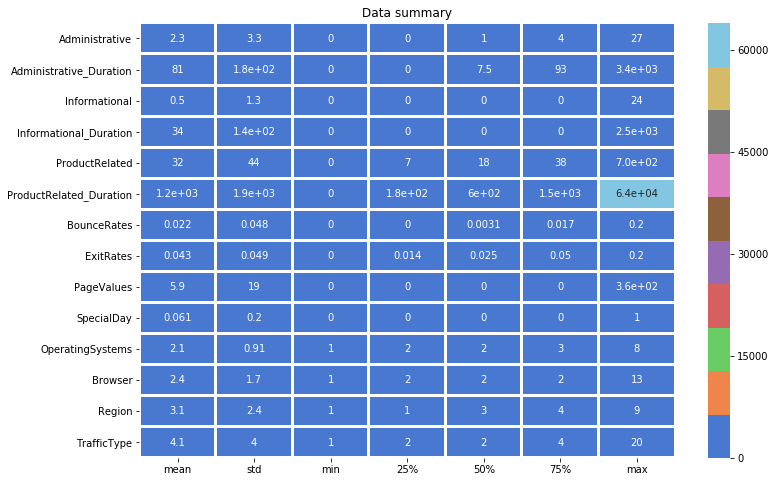

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("muted"))
plt.title("Data summary")
plt.show()

All  Categorical columns:

In [84]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [85]:
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [86]:
data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [87]:
data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [88]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [89]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [90]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

revenue generating customer:

False: 10422
True: 1908


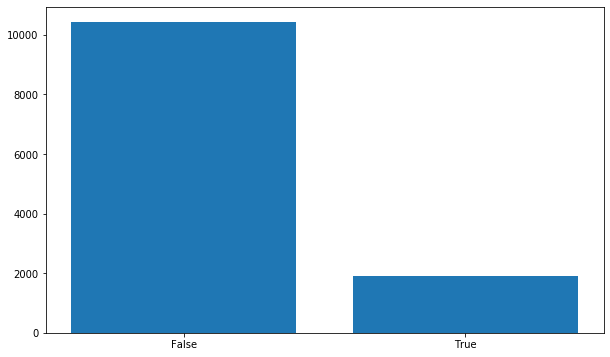

In [9]:
plt.figure(figsize=(10,6))
print('False:',len(data[data.Revenue == 0]))
print('True:',len(data[data.Revenue == 1]))
y = len(data[data.Revenue == 0]),len(data[data.Revenue == 1])
x = ['False','True']
plt.bar(x,y)
plt.show()

From the above countplot graph, it can be seen the data is highly imbalanced where approx.20% data is shared among True that is the revenue generator visitors and rest 80% are the non revenue generatoring visitors.

Distribution of the visitor's :

In [10]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

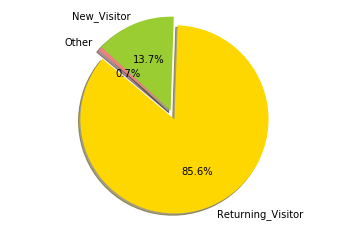

In [11]:
labels = 'Returning_Visitor', 'New_Visitor', 'Other'
sizes = [10551,  1694,  85]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

the above pie plot showing that distribution of the visitortype among the 3 cateogory :
1.)new_visitor = 13.7%
2.)returning_visitor =  85.6%
3.)others = 0.7%
so,for now it can be said that the returning visitor may have major share in revenue generation as compared to the other two categories.

In [12]:
x = data[data['Revenue']==True]['VisitorType'].value_counts()

In [13]:
y = data[data['Revenue']==False]['VisitorType'].value_counts()

In [14]:
x

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: VisitorType, dtype: int64

In [15]:
y

Returning_Visitor    9081
New_Visitor          1272
Other                  69
Name: VisitorType, dtype: int64

In [16]:
ret_rev = x[0]/(y[0]+x[0])
ret_rev

0.1393232868922377

In [17]:
new_rev = x[1]/(y[1]+x[1])
new_rev

0.24911452184179456

In [18]:
other_rev = x[2]/(x[2]+y[2])
other_rev

0.18823529411764706

In [19]:
D = {'revenue generation percentage':[0.1393232868922377,0.24911452184179456,0.18823529411764706]}
dd = pd.DataFrame(D,index = ['returning_visitor','new_visitor','other'])
dd

,revenue generation percentage
returning_visitor,0.139323
new_visitor,0.249115
other,0.188235


from the above table , it shows that the contribution of the different categories to the revenue on the form of the percentage.

In [20]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


distribution of the reveune throughout the months:
    

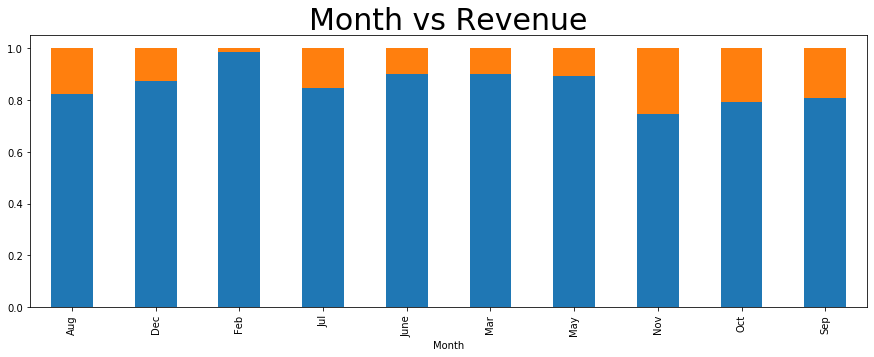

In [21]:
month  =  data['Month'].sort_values(ascending=True)
df = pd.crosstab(month, data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5),legend = False)
plt.title('Month vs Revenue', fontsize = 30)
plt.show()

from the above stacked bar plot, it can be observed that the highest revenue generating month is november and lowest is the feb.

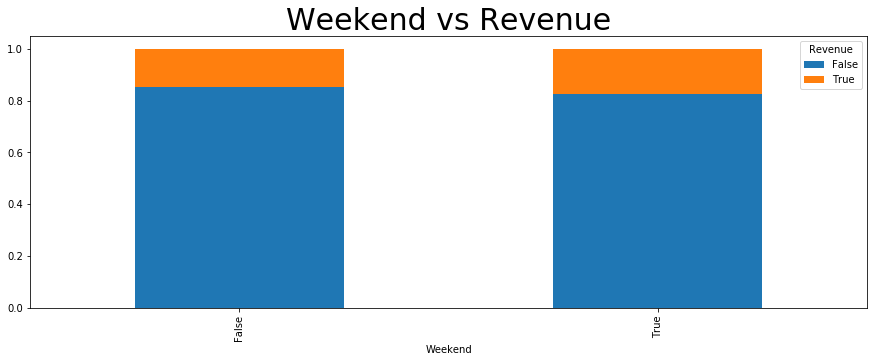

In [22]:

df1 = pd.crosstab(data['Weekend'], data['Revenue'])
df1.div(df1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()


from the above stacked bar plot, it can be observed that there is no significant difference in the weekend and weekdays.

In [23]:
#data1 = data.drop(['Revenue','Weekend'],axis = 1)
#sns.pairplot(data = data1)

In [24]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

from the above heatmap, it can be seen that bouncerates and exitrates  , productrealted and productrelated_duration are highly correlated 

SInce, Bounce Rates and Exit Rates are highly correlated with each other . We have to drop either on of these for Assumptions

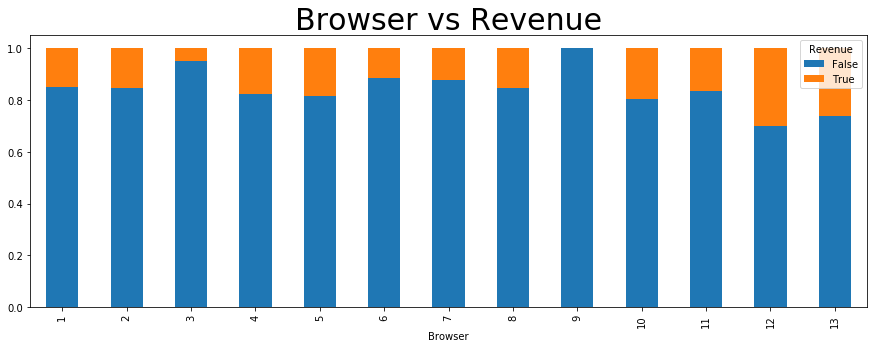

In [26]:
df2 = pd.crosstab(data['Browser'], data['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

from the above stacked bar graph, it can be observed that the 12th browser have the highest revenue and the lowest or nill can be seen on the 9th browser.

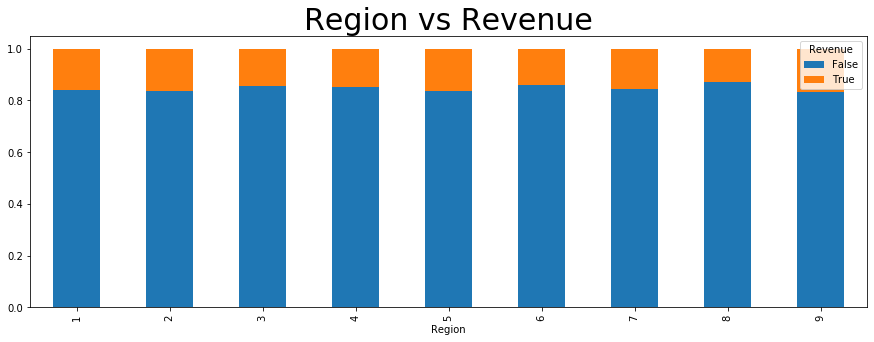

In [27]:
df3 = pd.crosstab(data['Region'], data['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

from the above stackedbar graph, it can be seen that there is a slight difference between regions.

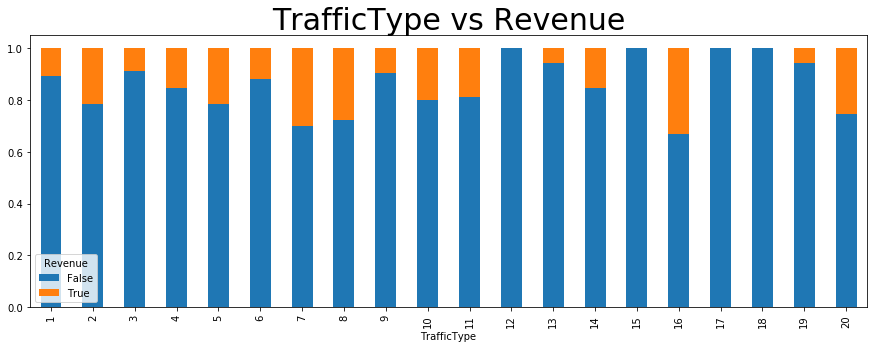

In [28]:
df4 = pd.crosstab(data['TrafficType'], data['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('TrafficType vs Revenue', fontsize = 30)
plt.show()

from the above stackedbar graph, it can be seen that the 7th and 16th are highest and the lowest is 12th

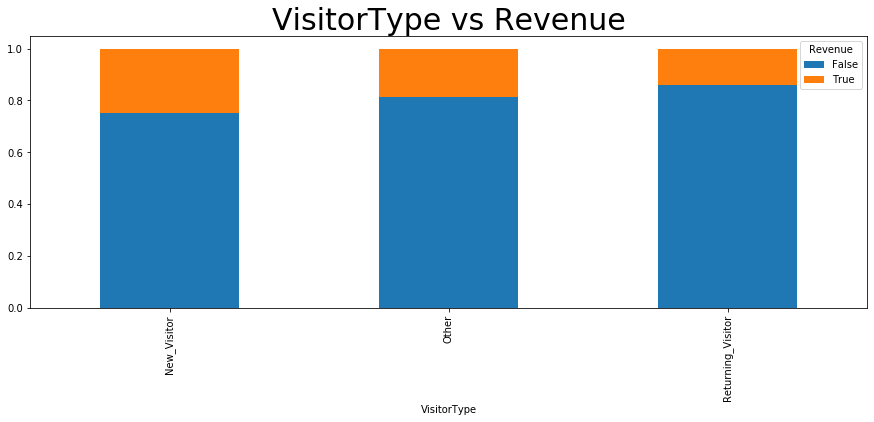

In [29]:
df5 = pd.crosstab(data['VisitorType'], data['Revenue'])
df5.div(df5.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('VisitorType vs Revenue', fontsize = 30)
plt.show()

from the above stacked bar graph,it can be seen that the highest revenue is generated by the new_visitor and least is by the returning_visitor

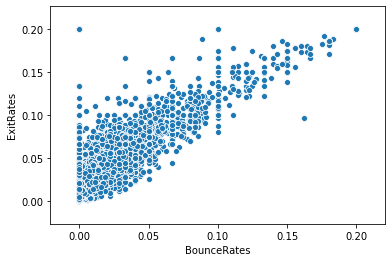

In [30]:
sns.scatterplot(x = data['BounceRates'],y = data['ExitRates'],data =  data)

from the above scatterplot it can be seen that bouncerate and exitrates follow a specific pattern that  if the bouncerate increases the exitrates also increases.

In [31]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

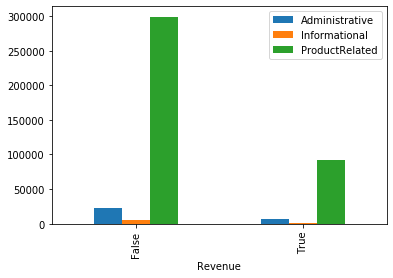

In [32]:
data[['Administrative','Informational','ProductRelated']].groupby(data['Revenue']).agg('sum').plot.bar()

from the above graph ,it can be depicted that the revenue generated by the productrelated is the highest among the three pages.

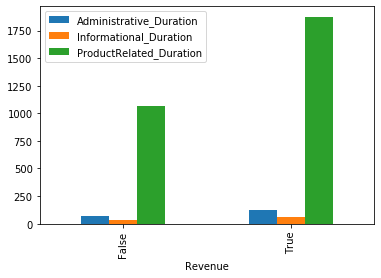

In [33]:
data[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].groupby(data['Revenue']).agg('mean').plot.bar()

from the above barplot ,it can be observed that the highest time a visitor is spending on a particular page is the productrelated.

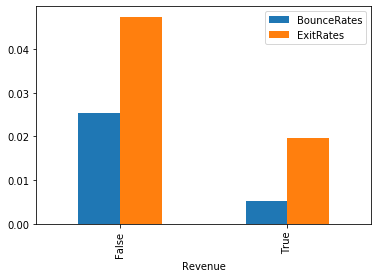

In [34]:
data[['BounceRates', 'ExitRates']].groupby(data['Revenue']).agg('mean').plot.bar()

it can be seen that the  customer's who don't buy anything from the pages switch and exits the page more faster than the customer's who  made a purchase.

one hot encoding for the revenue and weekend:

In [35]:
cate =  data[['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']]

In [36]:
data_num = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]

In [37]:
le = preprocessing.LabelEncoder()

labels_cate = cate.apply(le.fit_transform)

In [38]:
labels_cate.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,2,0,0,0,0,2,0,0
1,2,1,1,0,1,2,0,0
2,2,3,0,8,2,2,0,0
3,2,2,1,1,3,2,0,0
4,2,2,2,0,3,2,1,0


In [39]:
Data= pd.concat([data_num, labels_cate], axis=1)

In [40]:
Data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,1,0


In [41]:
Data.shape

(12330, 18)

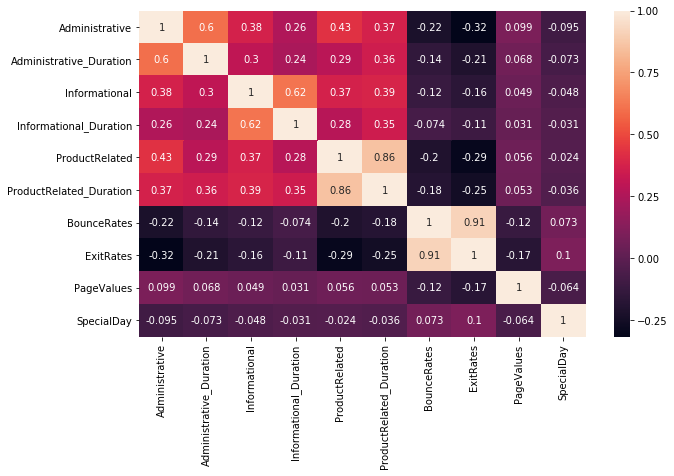

In [42]:
plt.figure(figsize=(10,6))
data_num = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]
sns.heatmap(data_num.corr(),annot  = True)


In [45]:
#Correlation with output variable
cor_target = abs(cor["Revenue"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.20]
relevant_features

ExitRates     0.207071
PageValues    0.492569
Revenue       1.000000
Name: Revenue, dtype: float64

ExitRates and PageValues are highly correlated .

checking for mulitcorrelarity.:

In [46]:
print(Data[['ExitRates','PageValues']].corr())

            ExitRates  PageValues
ExitRates    1.000000   -0.174498
PageValues  -0.174498    1.000000


we will keep PageValues and drop the ExitValues as it is more correlated to the target variable.

In [47]:
X = Data.drop(['Revenue'],axis = 1)
y = Data['Revenue']

In [48]:
model  = LogisticRegression()

In [49]:
#Initializing RFE model
rfe = RFE(model)

In [50]:
X.shape

(12330, 17)

In [51]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True  True  True  True  True False
 False False False  True  True]
[ 3  9  1  8  6 10  1  1  1  1  1  2  4  5  7  1  1]


there are 8 important features to be used .

In [52]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 8)            
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 
#Fitting the data to model
model.fit(X_rfe,y)             
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'Month', 'VisitorType', 'Weekend'],
      dtype='object')


In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_rfe)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.320804
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.255    
Dependent Variable: Revenue          AIC:              7927.0201
Date:               2019-12-30 10:25 BIC:              7986.3784
No. Observations:   12330            Log-Likelihood:   -3955.5  
Df Model:           7                LL-Null:          -5312.4  
Df Residuals:       12322            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
------------------------------------------------------------------
      Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
------------------------------------------------------------------
x1     0.0595     0.0191     3.1121   0.0019     0.0220     0.0970
x2    15.3090     3.2207     4.7533   0.0000     8.9965    21.6215
x3 

In [54]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [55]:
#the actual rfe to be done:
#no of features
nof_list=np.arange(1,18)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 16
Score with 16 features: 0.872128


optimum number of features is 16 and accuracy is 87.21%

In [56]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 16)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')


In [57]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [58]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_rfe)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.312184
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.275    
Dependent Variable: Revenue          AIC:              7730.4617
Date:               2019-12-30 10:25 BIC:              7849.1784
No. Observations:   12330            Log-Likelihood:   -3849.2  
Df Model:           15               LL-Null:          -5312.4  
Df Residuals:       12314            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
x1        -0.0324    0.0107   -3.0349  0.0024   -0.0534   -0.0115
x2        -0.0002    0.0002   -0.9100  0.3628   -0.0005    0.0002
x3      

In [59]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[2.0433460534249956,
 2.120439127855428,
 1.7793719701156194,
 6.6625470223229195,
 6.015118225952678,
 7.265148344856103,
 11.49276506444452,
 1.1349492735259594,
 1.132669600355663,
 4.337843929824709,
 2.592422682000978,
 1.713137682427546,
 1.7449411942169706,
 1.6601186235200278,
 5.7522668917305975,
 1.2822002666735999]

In [60]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [61]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[2.824253347279746, 2.0433460534249956, 2.120439127855428, 1.7793719701156194, 6.6625470223229195, 6.015118225952678, 7.265148344856103, 11.49276506444452, 1.1349492735259594, 1.132669600355663, 4.337843929824709, 2.592422682000978, 1.713137682427546, 1.7449411942169706, 1.6601186235200278, 5.7522668917305975, 1.2822002666735999]
Max VIF is for variable no.:
7
Iteration no.
2
[2.8002421134359317, 2.043010825979787, 2.1203284174357147, 1.7793611348846206, 6.546613496288969, 6.007786770859077, 1.3354463117842486, 1.1254516546872297, 1.1293269823973007, 4.224960991686765, 2.584346995509208, 1.704081736512592, 1.7386946170403388, 1.657089120498776, 4.824641090404642, 1.282006292126063]
Max VIF is for variable no.:
4
Iteration no.
3
[2.5783068927247266, 1.9678751861879957, 2.105461940864744, 1.7612026320521739, 1.9064859778256549, 1.3306011216042999, 1.1253967870422192, 1.128332292497716, 4.219736970713297, 2.5837933100261683, 1.7040741554030172, 1.7382738920243237, 1.656783

In [62]:
## includes only the relevant features.
train_out.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,2,0,0,0,0,2,0
1,0,0.0,0,0.0,64.000000,0.00,0.0,0.0,2,1,1,0,1,2,0
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,2,3,0,8,2,2,0
3,0,0.0,0,0.0,2.666667,0.05,0.0,0.0,2,2,1,1,3,2,0
4,0,0.0,0,0.0,627.500000,0.02,0.0,0.0,2,2,2,0,3,2,1


In [63]:
import statsmodels.api as sm
logit_model=sm.Logit(y,train_out)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.321838
         Iterations 9
                              Results: Logit
Model:                   Logit               Pseudo R-squared:    0.253    
Dependent Variable:      Revenue             AIC:                 7966.5183
Date:                    2019-12-30 10:25    BIC:                 8077.8152
No. Observations:        12330               Log-Likelihood:      -3968.3  
Df Model:                14                  LL-Null:             -5312.4  
Df Residuals:            12315               LLR p-value:         0.0000   
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          9.0000                                            
---------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------
Administrative   

In [64]:
Data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue' ]]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,0.000000,0.200000,0.000000,0.0,2,0,0,0,0,2,0,0
1,0,0.000000,0,0.00,64.000000,0.000000,0.000000,0.0,2,1,1,0,1,2,0,0
2,0,0.000000,0,0.00,0.000000,0.200000,0.000000,0.0,2,3,0,8,2,2,0,0
3,0,0.000000,0,0.00,2.666667,0.050000,0.000000,0.0,2,2,1,1,3,2,0,0
4,0,0.000000,0,0.00,627.500000,0.020000,0.000000,0.0,2,2,2,0,3,2,1,0
5,0,0.000000,0,0.00,154.216667,0.015789,0.000000,0.0,2,1,1,0,2,2,0,0
6,0,0.000000,0,0.00,0.000000,0.200000,0.000000,0.4,2,1,3,2,2,2,0,0
7,1,0.000000,0,0.00,0.000000,0.200000,0.000000,0.0,2,0,1,0,4,2,1,0
8,0,0.000000,0,0.00,37.000000,0.000000,0.000000,0.8,2,1,1,1,2,2,0,0
9,0,0.000000,0,0.00,738.000000,0.000000,0.000000,0.4,2,1,3,0,1,2,0,0


In [65]:
Data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,1,0


In [66]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)

In [67]:
X = Data.drop('Revenue', axis=1)
y = Data['Revenue']


AUC score of Train: 0.8969215524150219
[[7175  170]
 [ 802  484]]


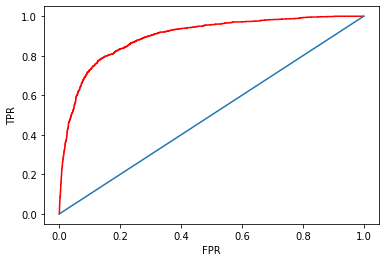

848
AUC score of Test: 0.88246057514157
[[3005   72]
 [ 401  221]]


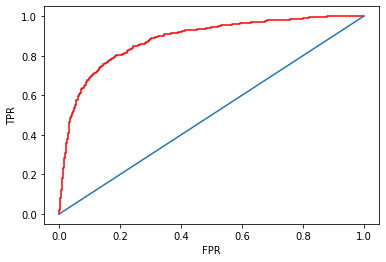

408


In [68]:
model_fit(model, X_train, y_train, X_test,y_test)

In [69]:
models = []

lr = LogisticRegression()
RF = RandomForestClassifier(n_estimators = 10,random_state = 0)

In [70]:

models.append(('LogisticRegression',lr))
models.append(('Random Forest',RF))

 LogisticRegression: 0.889211 (0.000040)
 Random Forest: 0.895223 (0.000044)


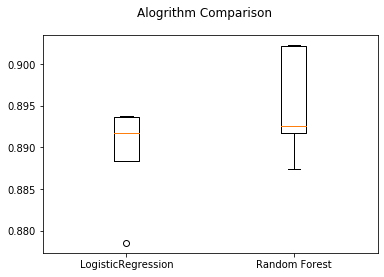

In [71]:

results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 5, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,y,cv= kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(" %s: %f (%f)" %(name,np.mean(cv_results),np.var(cv_results,ddof = 1)))
    #boxplot algorithm comparsion:
fig = plt.figure()
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
knn = KNeighborsClassifier()


param = {'n_neighbors':np.arange(1,10),'weights':['uniform','distance']}
GS = GridSearchCV(knn,param,cv=15,scoring='roc_auc')

GS.fit(X,y)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [73]:
GS.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [74]:
knn_final = KNeighborsClassifier(n_neighbors = 452, weights = 'distance')

In [75]:
models = []
models.append(('knn',knn_final))

knn: 0.769862 (0.000398)


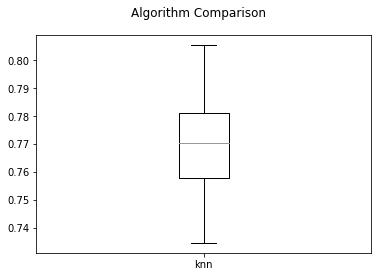

In [76]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
    #boxplot algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)

AUC score of Train: 0.9998108127851174
[[7342    3]
 [  52 1234]]


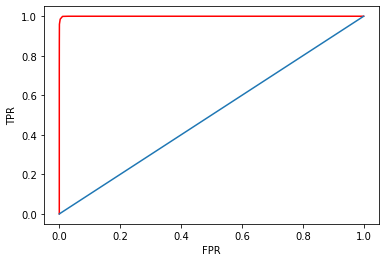

7
AUC score of Test: 0.8868372543097999
[[2959  118]
 [ 299  323]]


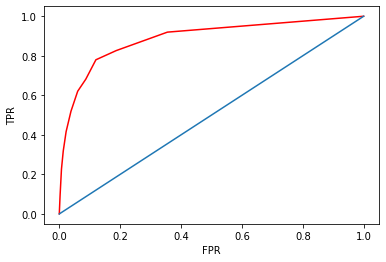

8


In [78]:
model_fit(RF, X_train, y_train, X_test,y_test)

AUC score of Train: 1.0
[[7345    0]
 [   0 1286]]


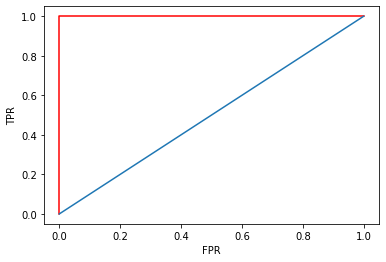

1
AUC score of Test: 0.7418433309263732
[[3077    0]
 [ 622    0]]


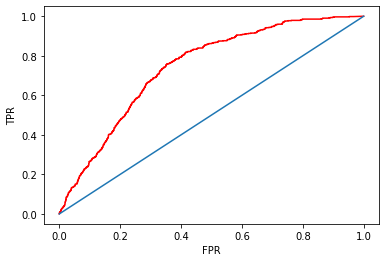

650


In [79]:
model_fit(knn_final, X_train, y_train, X_test,y_test)

###  Cheking Hyperparameters Optimization:
    
Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data

In [80]:
fit_rf = RandomForestClassifier(random_state=42)

In [81]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  28.62


In [82]:
fit_rf.set_params(criterion = 'gini',max_features = None,max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)